**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [3]:
# Import data set
df = pd.read_csv('cleaned_data.csv')

In [4]:
# Create features list
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [6]:
scaler = MinMaxScaler()

_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [7]:
my_lr= LogisticRegression(solver='saga',max_iter = 1000)

_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [8]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', scaler), ('LR', my_lr)])

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [9]:
# Use `get_params`
param= pipe.get_params()

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [10]:
# View what `model__C` is set to currently
param['LR__C']

1.0

In [11]:
# Change `model__C` to 2
pipe.set_params(LR__C = 2)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('LR', LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False))])

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [12]:
c_vals = [10**2,10,1,10**(-1),10**(-2),10**(-3)]

Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [13]:
kfold = StratifiedKFold(n_splits=4,shuffle=True ,random_state=1)

_____________________________________________________
**Next, make a new version of the `cross_val_C_search` function, called `cross_val_C_search_pipe`. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the `C` value using `set_params(model__C = <value you want to test>)` on the pipeline, replacing the model with the pipeline for the fit and `predict_proba` methods, and accessing the `C` value using `pipeline.get_params()['model__C']` for the printed status update.**

In [14]:
def cross_val_C_search_pipe(pipe,C,fc=False):
    """
    Set the C value on the pipeline.
    """
    pipe.set_params(LR__C = C)
    pipe.fit(X_train,y_train)
    if (fc):
        print(f"For {pipe.get_params()['LR__C']} predicted proba is:{pipe.predict_proba(X_test)}")
        print("-------------------------------------------------------------")
    return pipe.predict_proba(X_test)

_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

In [15]:
for i in c_vals: 
    a=cross_val_C_search_pipe(pipe,i,fc=True)
    b=a
    b=(b+0)/len(c_vals)
    print(a)
print(b)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For 100 predicted proba is:[[0.44850826 0.55149174]
 [0.63390937 0.36609063]
 [0.9000297  0.0999703 ]
 ...
 [0.87980042 0.12019958]
 [0.60680165 0.39319835]
 [0.46347379 0.53652621]]
-------------------------------------------------------------
[[0.44850826 0.55149174]
 [0.63390937 0.36609063]
 [0.9000297  0.0999703 ]
 ...
 [0.87980042 0.12019958]
 [0.60680165 0.39319835]
 [0.46347379 0.53652621]]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For 10 predicted proba is:[[0.44979807 0.55020193]
 [0.6354522  0.3645478 ]
 [0.90228282 0.09771718]
 ...
 [0.87418193 0.12581807]
 [0.60995588 0.39004412]
 [0.46542266 0.53457734]]
-------------------------------------------------------------
[[0.44979807 0.55020193]
 [0.6354522  0.3645478 ]
 [0.90228282 0.09771718]
 ...
 [0.87418193 0.12581807]
 [0.60995588 0.39004412]
 [0.46542266 0.53457734]]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For 1 predicted proba is:[[0.45974703 0.54025297]
 [0.64351078 0.35648922]
 [0.90348208 0.09651792]
 ...
 [0.85954744 0.14045256]
 [0.62246298 0.37753702]
 [0.47606174 0.52393826]]
-------------------------------------------------------------
[[0.45974703 0.54025297]
 [0.64351078 0.35648922]
 [0.90348208 0.09651792]
 ...
 [0.85954744 0.14045256]
 [0.62246298 0.37753702]
 [0.47606174 0.52393826]]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For 0.1 predicted proba is:[[0.52487357 0.47512643]
 [0.6675374  0.3324626 ]
 [0.88618535 0.11381465]
 ...
 [0.82756145 0.17243855]
 [0.66883633 0.33116367]
 [0.53805765 0.46194235]]
-------------------------------------------------------------
[[0.52487357 0.47512643]
 [0.6675374  0.3324626 ]
 [0.88618535 0.11381465]
 ...
 [0.82756145 0.17243855]
 [0.66883633 0.33116367]
 [0.53805765 0.46194235]]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For 0.01 predicted proba is:[[0.68337325 0.31662675]
 [0.72531974 0.27468026]
 [0.8303482  0.1696518 ]
 ...
 [0.78302655 0.21697345]
 [0.75372354 0.24627646]
 [0.69481478 0.30518522]]
-------------------------------------------------------------
[[0.68337325 0.31662675]
 [0.72531974 0.27468026]
 [0.8303482  0.1696518 ]
 ...
 [0.78302655 0.21697345]
 [0.75372354 0.24627646]
 [0.69481478 0.30518522]]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For 0.001 predicted proba is:[[0.76242253 0.23757747]
 [0.76800825 0.23199175]
 [0.78787469 0.21212531]
 ...
 [0.77695321 0.22304679]
 [0.77662506 0.22337494]
 [0.76735391 0.23264609]]
-------------------------------------------------------------
[[0.76242253 0.23757747]
 [0.76800825 0.23199175]
 [0.78787469 0.21212531]
 ...
 [0.77695321 0.22304679]
 [0.77662506 0.22337494]
 [0.76735391 0.23264609]]
[[0.12707042 0.03959625]
 [0.12800137 0.03866529]
 [0.13131245 0.03535422]
 ...
 [0.1294922  0.03717447]
 [0.12943751 0.03722916]
 [0.12789232 0.03877435]]


_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

0.7019639049318321


Text(0.5,1,'ROC curve')

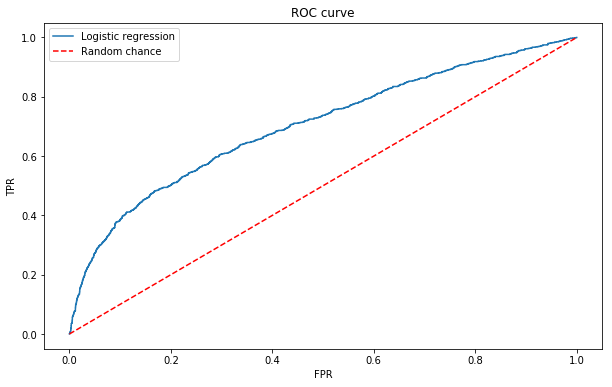

In [16]:
plt.figure(figsize=(10,6))
y_pred=b[:,1]
fpr, tpr, thresholds =roc_curve(y_test,y_pred)
print(roc_auc_score(y_test,y_pred))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [17]:

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_trans = poly.fit_transform(X_train)

_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [18]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**

X_train,X_test,Y_train,Y_test = train_test_split( df[features_response[:-1]].values,df['default payment next month'].values,test_size = 0.20,random_state = 24)

In [19]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.
for i in c_vals: 
    a=cross_val_C_search_pipe(pipe,i,fc=True)
    b=a
    b=(b+0)/len(c_vals)
    print(a)
print(b)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For 100 predicted proba is:[[0.44850792 0.55149208]
 [0.63390923 0.36609077]
 [0.9000295  0.0999705 ]
 ...
 [0.87979985 0.12020015]
 [0.60680126 0.39319874]
 [0.46347336 0.53652664]]
-------------------------------------------------------------
[[0.44850792 0.55149208]
 [0.63390923 0.36609077]
 [0.9000295  0.0999705 ]
 ...
 [0.87979985 0.12020015]
 [0.60680126 0.39319874]
 [0.46347336 0.53652664]]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For 10 predicted proba is:[[0.44979893 0.55020107]
 [0.63545302 0.36454698]
 [0.90228319 0.09771681]
 ...
 [0.8741821  0.1258179 ]
 [0.60995698 0.39004302]
 [0.46542368 0.53457632]]
-------------------------------------------------------------
[[0.44979893 0.55020107]
 [0.63545302 0.36454698]
 [0.90228319 0.09771681]
 ...
 [0.8741821  0.1258179 ]
 [0.60995698 0.39004302]
 [0.46542368 0.53457632]]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For 1 predicted proba is:[[0.45974614 0.54025386]
 [0.64351    0.35649   ]
 [0.9034801  0.0965199 ]
 ...
 [0.85954592 0.14045408]
 [0.62246177 0.37753823]
 [0.47606149 0.52393851]]
-------------------------------------------------------------
[[0.45974614 0.54025386]
 [0.64351    0.35649   ]
 [0.9034801  0.0965199 ]
 ...
 [0.85954592 0.14045408]
 [0.62246177 0.37753823]
 [0.47606149 0.52393851]]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For 0.1 predicted proba is:[[0.52487002 0.47512998]
 [0.66754895 0.33245105]
 [0.88619603 0.11380397]
 ...
 [0.82757028 0.17242972]
 [0.66885333 0.33114667]
 [0.53807139 0.46192861]]
-------------------------------------------------------------
[[0.52487002 0.47512998]
 [0.66754895 0.33245105]
 [0.88619603 0.11380397]
 ...
 [0.82757028 0.17242972]
 [0.66885333 0.33114667]
 [0.53807139 0.46192861]]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For 0.01 predicted proba is:[[0.68336251 0.31663749]
 [0.72530243 0.27469757]
 [0.83033768 0.16966232]
 ...
 [0.78302381 0.21697619]
 [0.75369866 0.24630134]
 [0.69479094 0.30520906]]
-------------------------------------------------------------
[[0.68336251 0.31663749]
 [0.72530243 0.27469757]
 [0.83033768 0.16966232]
 ...
 [0.78302381 0.21697619]
 [0.75369866 0.24630134]
 [0.69479094 0.30520906]]


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


For 0.001 predicted proba is:[[0.76241988 0.23758012]
 [0.76800463 0.23199537]
 [0.78787235 0.21212765]
 ...
 [0.77695157 0.22304843]
 [0.7766221  0.2233779 ]
 [0.76735111 0.23264889]]
-------------------------------------------------------------
[[0.76241988 0.23758012]
 [0.76800463 0.23199537]
 [0.78787235 0.21212765]
 ...
 [0.77695157 0.22304843]
 [0.7766221  0.2233779 ]
 [0.76735111 0.23264889]]
[[0.12706998 0.03959669]
 [0.12800077 0.0386659 ]
 [0.13131206 0.03535461]
 ...
 [0.12949193 0.03717474]
 [0.12943702 0.03722965]
 [0.12789185 0.03877482]]


0.7019620398749168


Text(0.5,1,'ROC curve')

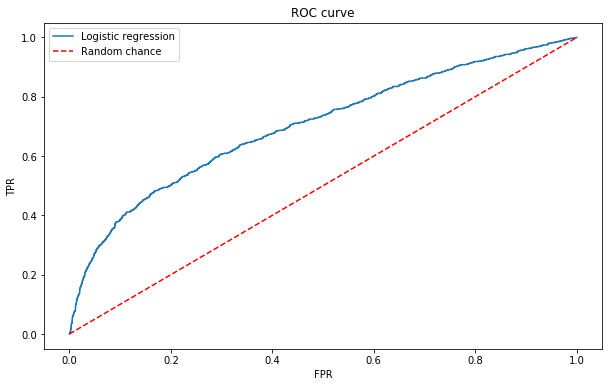

In [20]:
# Plot the average training and testing ROC AUC across folds, for each C value.
plt.figure(figsize=(10,6))
y_pred=b[:,1]
fpr, tpr, thresholds =roc_curve(y_test,y_pred)
print(roc_auc_score(y_test,y_pred))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

**Take a look at the above graph. Does the average cross-validation testing performance improve with the interaction features? Is regularization useful?**